In [2]:
import pandas as pd
import geopandas as gpd
import folium

ModuleNotFoundError: No module named 'geopandas'

SA2 shape file: https://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/1270.0.55.001July%202016?OpenDocument

In [ ]:
property = pd.read_csv("../../data/curated/API_clean_price_with_SA2_using_geolocation.csv")
boundary = gpd.read_file("../../data/raw/Geo/SA2_2021_AUST_SHP_GDA2020/SA2_2021_AUST_GDA2020.shp")

In [ ]:
boundary.head()

,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,101021007,Braidwood,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,3418.3525,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,6.9825,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21899 -35.36738, 149.21800 -35.3..."
2,101021009,Queanbeyan,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,4.7620,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."
3,101021010,Queanbeyan - East,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.0032,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3..."
4,101021012,Queanbeyan West - Jerrabomberra,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.6748,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.19572 -35.36126, 149.19970 -35.3..."


In [ ]:
boundary = boundary[boundary.STE_NAME21 == 'Victoria']
#boundary.SA2_NAME21 = boundary.SA2_NAME21.str.upper()
geo = boundary[['SA2_CODE21','SA2_NAME21', 'geometry']]
geo.head()

,SA2_CODE21,SA2_NAME21,geometry
644,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5..."
645,201011002,Ballarat,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5..."
646,201011005,Buninyong,"POLYGON ((143.84171 -37.61596, 143.84176 -37.6..."
647,201011006,Delacombe,"POLYGON ((143.75050 -37.59119, 143.75044 -37.5..."
648,201011007,Smythes Creek,"POLYGON ((143.73296 -37.62333, 143.73263 -37.6..."


In [ ]:
geo.SA2_CODE21 = geo.SA2_CODE21.astype(int)
property.SA2_CODE = property.SA2_CODE.astype(int)

/Users/graceliu/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
property.head()

,Unnamed: 0,id,time,listing_type,price,property_type,area,building_area,land_area,bedrooms,bathrooms,carspaces,street_address,suburb,postcode,latitude,longitude,weekly_rent,SA2_CODE
0,0,16066003,2022-08-31T13:00:15,Rent,$320,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,1.0,1.0,0,"1007/238 Flinders St, Melbourne",MELBOURNE,3000,-37.817516,144.966492,320,206041503
1,1,16065974,2022-08-31T12:50:55,Rent,$700,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,2.0,0,"1211/260 Spencer Street, Melbourne",MELBOURNE,3000,-37.814564,144.952286,700,206041505
2,2,15302782,2022-08-31T10:12:30,Rent,$395_per_week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,1.0,0,"504/350 La Trobe Street, Melbourne",MELBOURNE,3000,-37.810680,144.959274,395,206041504
3,3,16064379,2022-08-30T15:20:28,Rent,$370_per_week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,1.0,1.0,0,"1106/555 Flinders Street, Melbourne",MELBOURNE,3000,-37.820972,144.956482,370,206041505
4,4,16064243,2022-08-30T14:50:32,Rent,$500_per_week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,1.0,1,"2901/200 Spencer Street, Melbourne",MELBOURNE,3000,-37.816227,144.953247,500,206041505


In [ ]:
gdf = property.merge(geo, how='left', left_on='SA2_CODE', right_on = 'SA2_CODE21')

In [ ]:
gdf.columns

Index(['Unnamed: 0', 'id', 'time', 'listing_type', 'price', 'property_type',
       'area', 'building_area', 'land_area', 'bedrooms', 'bathrooms',
       'carspaces', 'street_address', 'suburb', 'postcode', 'latitude',
       'longitude', 'weekly_rent', 'SA2_CODE', 'SA2_CODE21', 'SA2_NAME21',
       'geometry'],
      dtype='object')

In [ ]:
COLS = ['weekly_rent', 'SA2_CODE21','SA2_NAME21', 'geometry','property_type','postcode','bedrooms','price']
gsdf_pd = gdf[COLS]
gsdf_pd.head()

,weekly_rent,SA2_CODE21,SA2_NAME21,geometry,property_type,postcode,bedrooms,price
0,320,206041503,Melbourne CBD - East,"POLYGON ((144.96534 -37.81137, 144.96576 -37.8...",ApartmentUnitFlat,3000,1.0,$320
1,700,206041505,Melbourne CBD - West,"POLYGON ((144.95280 -37.81610, 144.95235 -37.8...",ApartmentUnitFlat,3000,2.0,$700
2,395,206041504,Melbourne CBD - North,"POLYGON ((144.95569 -37.80771, 144.95599 -37.8...",ApartmentUnitFlat,3000,2.0,$395_per_week
3,370,206041505,Melbourne CBD - West,"POLYGON ((144.95280 -37.81610, 144.95235 -37.8...",ApartmentUnitFlat,3000,1.0,$370_per_week
4,500,206041505,Melbourne CBD - West,"POLYGON ((144.95280 -37.81610, 144.95235 -37.8...",ApartmentUnitFlat,3000,2.0,$500_per_week


In [ ]:
geoboundary = boundary[['SA2_NAME21', 'geometry']].dropna()
#geoboundary = geoboundary.drop_duplicates('SA2_CODE21')
len(geoboundary)

522

In [ ]:
print(set(gsdf_pd.property_type))

{'Villa', 'CarSpace', 'ApartmentUnitFlat', 'Studio', 'NewHouseLand', 'Townhouse', 'NewApartments', 'Duplex', 'House', 'Terrace', 'Rural', 'AcreageSemiRural', 'Penthouse', 'SemiDetached'}


In [ ]:
house_type = gsdf_pd[['property_type', 'weekly_rent','postcode']] \
                .groupby(['property_type'],as_index = False) \
                .agg(
                    {\
                        'weekly_rent': 'mean', # count number of instances from sample
                        'postcode': 'count'
                    }
                ) \
                .rename({'postcode': 'num','weekly_rent': 'averaged_wk_rent' }, axis=1)

house_type

,property_type,averaged_wk_rent,num
0,AcreageSemiRural,801.428571,14
1,ApartmentUnitFlat,474.766258,5797
2,CarSpace,50.000000,1
3,Duplex,546.000000,5
4,House,532.659882,7124
5,NewApartments,476.833333,6
6,NewHouseLand,435.000000,2
7,Penthouse,825.000000,1
8,Rural,1000.000000,1
9,SemiDetached,673.125000,8


<AxesSubplot:xlabel='averaged_wk_rent', ylabel='property_type'>

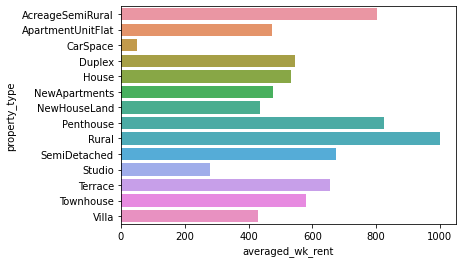

In [ ]:
import seaborn as sns
sns.barplot(
    data=house_type, x="averaged_wk_rent", y="property_type"
)


<AxesSubplot:xlabel='num', ylabel='property_type'>

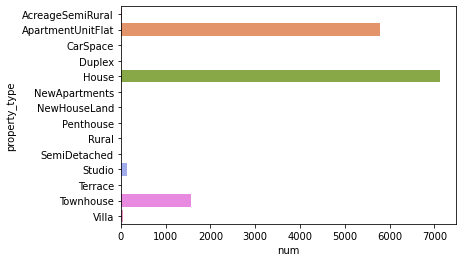

In [ ]:
sns.barplot(
    data=house_type, x="num", y="property_type"
)

In [ ]:
# classify types of properties
house = ['Villa', 'NewHouseLand', 'Townhouse', 'Duplex', 'House', 'Terrace', 'SemiDetached']
apartment = ['ApartmentUnitFlat', 'Studio', 'NewApartments', 'Penthouse']
rural = ['Rural', 'AcreageSemiRural']

# initialise geo spatial dataframe for each type of property
house_gsdf = gsdf_pd[gsdf_pd.property_type.isin(house)]
apartment_gsdf = gsdf_pd[gsdf_pd.property_type.isin(apartment)]
rural_gsdf = gsdf_pd[gsdf_pd.property_type.isin(rural)]


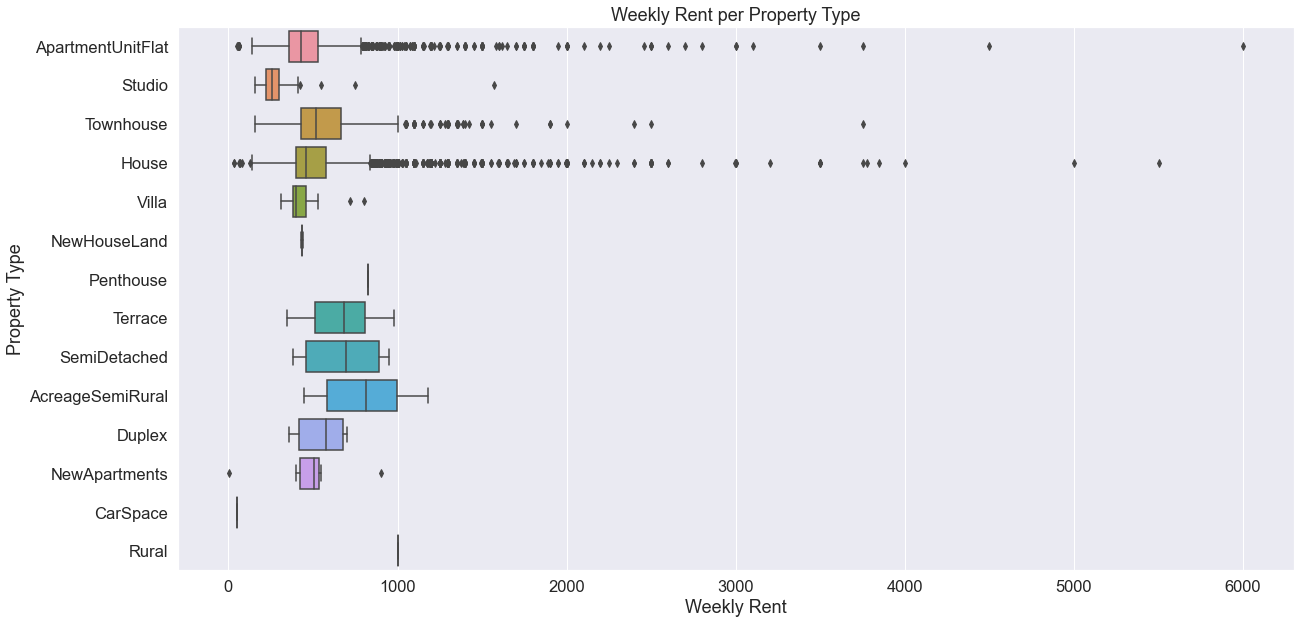

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=1.5)
b = sns.boxplot(
    data=gsdf_pd, x="weekly_rent", y="property_type"
)
b.axes.set_title("Weekly Rent per Property Type")
b.set_xlabel("Weekly Rent")
b.set_ylabel("Property Type")
b.figure.savefig("../../plots/Weekly Rent per Property Type.png")


In [ ]:
house_df = house_gsdf[house_gsdf.property_type == 'House']
house_df = house_df[house_df.weekly_rent < 100]
house_df

,weekly_rent,SA2_CODE21,SA2_NAME21,geometry,property_type,postcode,bedrooms,price
740,81,206051514,St Kilda - West,"POLYGON ((144.97031 -37.86077, 144.97018 -37.8...",House,3004,1.0,$81_per_week
863,60,206041508,Southbank (West) - South Wharf,"POLYGON ((144.96478 -37.81970, 144.96539 -37.8...",House,3006,1.0,From_$60pw_-_2_spots_available
11963,66,217041480,Warrnambool - South,"POLYGON ((142.45281 -38.39126, 142.45230 -38.3...",House,3280,1.0,$66
13921,70,205011078,Trafalgar (Vic.),"POLYGON ((146.01963 -38.21327, 146.01984 -38.2...",House,3824,1.0,$70
13944,33,205041095,Moe - Newborough,"POLYGON ((146.22333 -38.17787, 146.22315 -38.1...",House,3825,1.0,From_$33pw
14659,34,205031089,Korumburra,"POLYGON ((145.68903 -38.43946, 145.68893 -38.4...",House,3987,1.0,$34.52


# Geo visualisation for 'house' type properties

In [ ]:
geoJSON = geoboundary.to_json()

'{"type": "FeatureCollection", "features": [{"id": "644", "type": "Feature", "properties": {"SA2_NAME21": "Alfredton"}, "geometry": {"type": "Polygon", "coordinates": [[[143.78282104711133, -37.5666578'

In [ ]:
import os
newpath = r'../../plots/aggregated_geo/' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [ ]:
house_weekly_rent = house_gsdf[['SA2_NAME21', 'weekly_rent','bedrooms']] \
                .groupby(['SA2_NAME21'],as_index = False) \
                .agg(
                    {\
                        'weekly_rent': 'mean', # count number of instances from sample
                        'bedrooms': 'count'
                    }
                ) \
                .rename({'bedrooms': 'total_number_sa2','weekly_rent': 'mean_weekly_rent_sa2' }, axis=1)

house_weekly_rent.head()
#print(len(weekly_rent))

,SA2_NAME21,mean_weekly_rent_sa2,total_number_sa2
0,Abbotsford,678.076923,13
1,Airport West,456.666667,18
2,Albert Park,1070.333333,15
3,Alexandra,375.000000,4
4,Alfredton,437.763158,38


In [ ]:
geoJSON

In [158]:
m = folium.Map(location=[-37.81, 144.96], tiles="Stamen Terrain", zoom_start=10, color='white')
svg_style = '<style>svg {background-color: rgb(255, 255, 255,0.5);}</style>'
m.get_root().header.add_child(folium.Element(svg_style))

c = folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
    data=house_weekly_rent.reset_index(), 
    columns=['SA2_NAME21','mean_weekly_rent_sa2'],
    key_on='properties.SA2_NAME21', 
    fill_color='PiYG', 
    nan_fill_color='black',
    legend_name='house averaged weekly rent per sa2',
)

c.add_to(m)
#m
m.save('../../plots/aggregated_geo/house_price.html')

In [150]:
m = folium.Map(location=[-37.81, 144.96], tiles="Stamen Terrain", zoom_start=10, color='white')
svg_style = '<style>svg {background-color: rgb(255, 255, 255,0.5);}</style>'
m.get_root().header.add_child(folium.Element(svg_style))

c = folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
    data=house_weekly_rent.reset_index(), 
    columns=['SA2_NAME21','total_number_sa2'],
    key_on='properties.SA2_NAME21', 
    fill_color='PiYG', 
    nan_fill_color='black',
    legend_name='number of houses rented per sa2 in total',
)

c.add_to(m)
m.save('../../plots/aggregated_geo/house_number.html')

# Geo visualisation for 'apartment' type properties

In [142]:
apartment_weekly_rent = apartment_gsdf[['SA2_NAME21', 'weekly_rent','bedrooms']] \
                .groupby(['SA2_NAME21'],as_index = False) \
                .agg(
                    {\
                        'weekly_rent': 'mean', # count number of instances from sample
                        'bedrooms': 'count'
                    }
                ) \
                .rename({'bedrooms': 'total_number_sa2','weekly_rent': 'mean_weekly_rent_sa2' }, axis=1)

apartment_weekly_rent.head()

,SA2_NAME21,mean_weekly_rent_sa2,total_number_sa2
0,Abbotsford,513.970588,34
1,Airport West,372.000000,5
2,Albert Park,642.605634,71
3,Alfredton,270.000000,1
4,Alphington - Fairfield,401.043478,23


In [157]:
m = folium.Map(location=[-37.81, 144.96], tiles="Stamen Terrain", zoom_start=10, color='white')
svg_style = '<style>svg {background-color: rgb(255, 255, 255,0.5);}</style>'
m.get_root().header.add_child(folium.Element(svg_style))

c = folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
    data=apartment_weekly_rent.reset_index(), 
    columns=['SA2_NAME21','mean_weekly_rent_sa2'],
    key_on='properties.SA2_NAME21', 
    fill_color='PiYG', 
    nan_fill_color='black',
    legend_name='apartment averaged weekly rent per sa2',
)

c.add_to(m)
#m
m.save('../../plots/aggregated_geo/apartment_price.html')

In [1]:
m = folium.Map(location=[-37.81, 144.96], tiles="Stamen Terrain", zoom_start=10, color='white')
svg_style = '<style>svg {background-color: rgb(255, 255, 255,0.5);}</style>'
m.get_root().header.add_child(folium.Element(svg_style))

c = folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
    data=apartment_weekly_rent.reset_index(), 
    columns=['SA2_NAME21','total_number_sa2'],
    key_on='properties.SA2_NAME21', 
    fill_color='PiYG', 
    nan_fill_color='black',
    legend_name='number of apartments rented per sa2 in total',
)

c.add_to(m)
m.save('../../plots/aggregated_geo/apartment_number.html')


NameError: name 'folium' is not defined